In [1]:
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import warnings
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import label_map_util

2023-05-07 18:13:17.312368: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-07 18:13:17.464568: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-07 18:13:17.467521: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 18:13:20.790900: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Loading model...Done! Ready to perform object detection ...
running inference for /home/amos/Documents/Tensorflow/workspace/training_demo/testingImages/DJI_0679.JPG ....

2023-05-07 19:43:21.717895: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_tensor' with dtype uint8 and shape [1,?,?,3]
	 [[{{node input_tensor}}]]


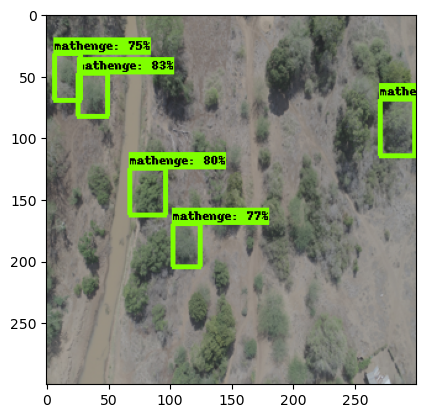

(300, 300, 3)
Done


In [26]:
warnings.filterwarnings('ignore') # Suppress matplotlib warnings

# Load trained model
model_path =  "/home/amos/Documents/Tensorflow/workspace/training_demo/exported_models/my_model/saved_model/"
label_path = "/home/amos/Documents/Tensorflow/workspace/training_demo/annotations/label_map.pbtxt"
image = "/home/amos/Documents/Tensorflow/workspace/training_demo/testingImages/DJI_0679.JPG"
print('Loading model...', end='')
detect_fn = tf.saved_model.load(model_path)
print('Done! Ready to perform object detection ...')
input_shape = detect_fn.signatures['serving_default'].inputs[0].shape.as_list()
category_index = label_map_util.create_category_index_from_labelmap(label_path,
                                                                    use_display_name=True)

def load_image_into_numpy_array(path, desired_size=(300, 300)):
    """Load an image from file into a numpy array
    
    puts image into numpy array to feed into tensorflow graph.
    Note that by convention, we put it into a numpy array with shape (height, width, channels), where channels = 3 for RGB
    args: file path to the image
    returns: uint8 numpy array with shape (img_height, img_width, 3)
    """
    image = Image.open(path)
    if desired_size is not None:
        image = image.resize(desired_size)
    image_np = np.array(image)
    return image_np.astype(np.uint8)

#for image_path in IMAGE_PATHS:
print('running inference for {} ....'.format(image), end='')
image_np = load_image_into_numpy_array(image)
input_tensor = tf.convert_to_tensor(image_np)
input_tensor = input_tensor[tf.newaxis, ...]
detections = detect_fn(input_tensor)
num_detections = int(detections.pop('num_detections'))
detections = {key:value[0, :num_detections].numpy()
                for key, value in detections.items()}
detections['num_detections'] = num_detections

#detection_classes should be ints
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
image_np_with_detections = image_np.copy()
viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections,
        detections['detection_boxes'],
        detections['detection_classes'],
        detections['detection_scores'],
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=200,
        min_score_thresh=0.75,
        agnostic_mode=False)
%matplotlib inline
plt.figure()
plt.imshow(image_np_with_detections)
plt.show()
print('Done')